# Assignment 8
## By: **Nils Dunlop, e-mail: gusdunlni@student.gu.se**

## Problem 1

In [129]:
class Palindrome:
    def __init__(self, word):
        # Splitting the string into a stack and queue
        self.stack, self.queue = self.split_string(word)

    def check_palindrome(self):
        # Check if the reversed stack matches the queue
        return self.stack == list(reversed(self.queue))

    @staticmethod
    def split_string(word):
        # Removing punctuation and converting to lowercase
        clean_string = ''.join(e for e in word if e.isalnum()).lower()

        # Splitting the string into individual characters
        elements = list(clean_string)

        mid_point = len(elements) // 2

        # Assigning first half to stack and second half to queue
        stack = elements[:mid_point]
        queue = elements[mid_point:]

        # If the string is odd, remove the first element from the queue
        if len(elements) % 2 != 0:
            queue.pop(0)

        return stack, queue

if __name__ == "__main__":
    # print("This program checks if your text is a palindrome!")
    # text = input(’Please enter your text: ’ )
    # check_palindrome(text)
    
    # True
    print("...True...")
    print(Palindrome("tattarrattat").check_palindrome())
    print(Palindrome("Able was I ere I saw Elba").check_palindrome())
    print(Palindrome("jajjjjaj").check_palindrome())
    print(Palindrome("jajjjaj").check_palindrome())
    print(Palindrome("jaJjjaJ").check_palindrome())
    print(Palindrome("jaJjjaJ").check_palindrome())
    print(Palindrome("1881").check_palindrome())
    print(Palindrome("181").check_palindrome())
    
    # False
    print("...False...")
    print(Palindrome("jaxxj").check_palindrome())
    print(Palindrome("jajaja").check_palindrome())
    print(Palindrome("18818").check_palindrome())

...True...
True
True
True
True
True
True
True
True
...False...
False
False
False


## Problem 2

In [130]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# Read the data
df = pd.read_csv("data.csv", sep=";")

# Read the informative data
df_info = pd.read_csv("Data_L15_info.csv")

#### What are the subjects that are particularly bad in terms of having high dropout?

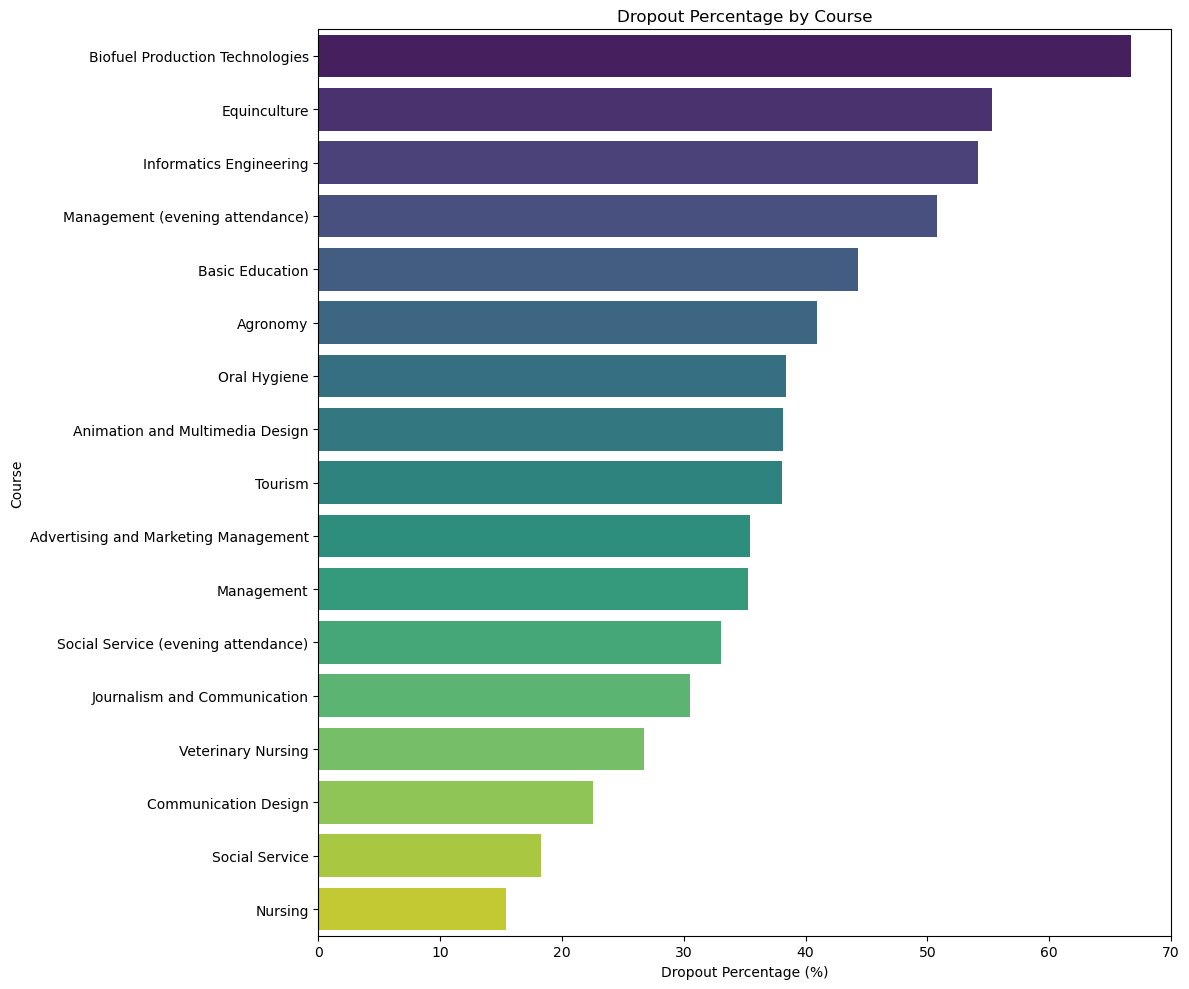

In [131]:
total_students_per_course = df.groupby('Course').size()
dropout_df = df[df['Target'] == 'Dropout']
course_dropout_counts = dropout_df.groupby('Course').size()
dropout_percentage = (course_dropout_counts / total_students_per_course) * 100
sorted_dropout_percentage = dropout_percentage.sort_values(ascending=False)
sorted_courses = course_dropout_counts.sort_values(ascending=False)

course_descriptions = df_info[df_info['Attribute Name'] == 'Course']['Description'].iloc[0]
splits = re.split(r'(?=\b\d+ -)', course_descriptions)
course_mapping = {}
for split in splits:
    if '-' in split:
        code, name = [item.strip() for item in split.split('-')]
        course_mapping[int(code)] = name


dropout_percentage_df = pd.DataFrame({
    "Course": sorted_dropout_percentage.index.map(course_mapping).tolist(),
    "Dropout %": sorted_dropout_percentage.values
})

def dataframe_barplot(dataframe):
    # Setting the figure size
    plt.figure(figsize=(12, 10))

    # Create a horizontal bar plot
    sns.barplot(x='Dropout %', y='Course', data=dataframe, palette='viridis')

    # Setting title and labels
    plt.title('Dropout Percentage by Course')
    plt.xlabel('Dropout Percentage (%)')
    plt.ylabel('Course')

    plt.tight_layout()
    plt.show()

dataframe_barplot(dropout_percentage_df)

#### What are the subjects that are particularly successful?

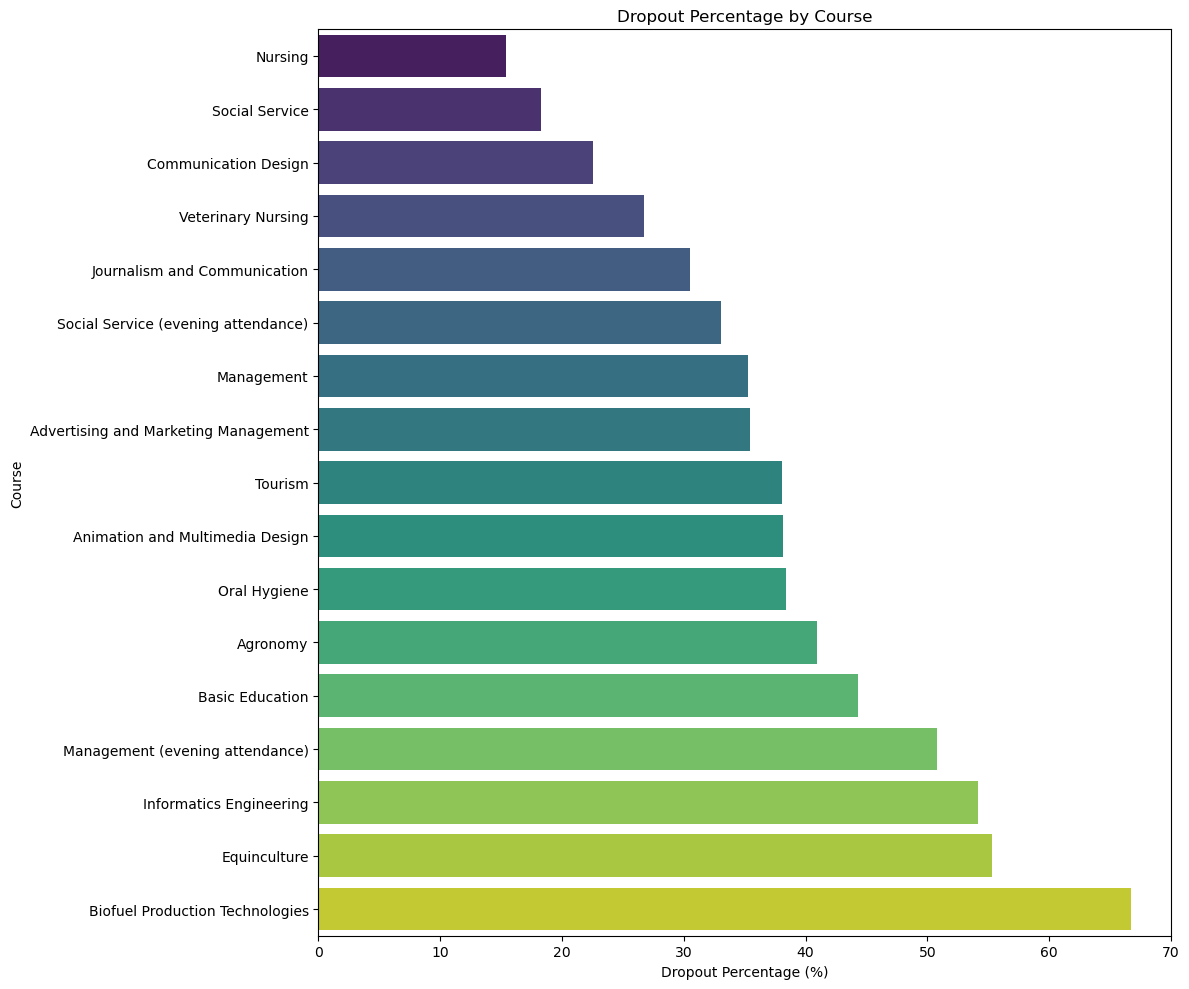

In [132]:
dropout_percentage_df = dropout_percentage_df.sort_values(by='Dropout %', ascending=True)
dataframe_barplot(dropout_percentage_df)

#### The institution wants to save resources by closing the evening classes. Does the data support for or against the institution’s plan?

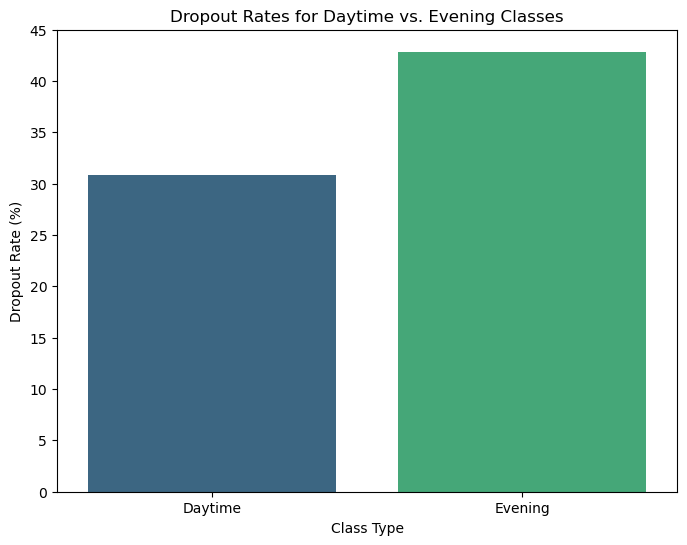

In [133]:
daytime_df = df[df['Daytime/evening attendance\t'] == 1]
evening_df = df[df['Daytime/evening attendance\t'] == 0]

daytime_dropout_rate = (len(daytime_df[daytime_df['Target'] == 'Dropout']) / len(daytime_df)) * 100
evening_dropout_rate = (len(evening_df[evening_df['Target'] == 'Dropout']) / len(evening_df)) * 100

plt.figure(figsize=(8, 6))
sns.barplot(x=['Daytime', 'Evening'], y=[daytime_dropout_rate, evening_dropout_rate], palette='viridis')
plt.title('Dropout Rates for Daytime vs. Evening Classes')
plt.ylabel('Dropout Rate (%)')
plt.xlabel('Class Type')
plt.show()

#### Is there any correlation between ”Previous qualification (grade)” and ”Admission grade”? If so, how strong/how weak is the correlation?

The correlation between 'Previous qualification (grade)' and 'Admission grade' is: 0.58


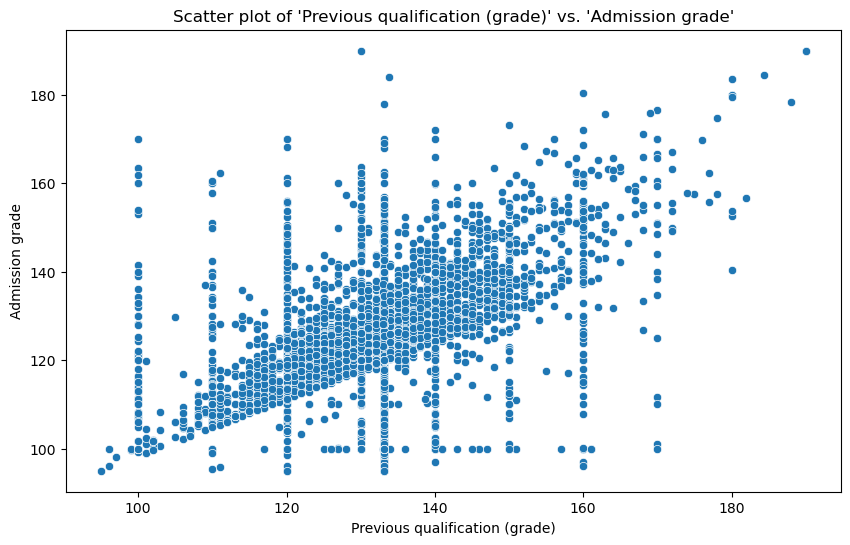

In [134]:
correlation = df["Previous qualification (grade)"].corr(df["Admission grade"])
print(f"The correlation between 'Previous qualification (grade)' and 'Admission grade' is: {correlation:.2f}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Previous qualification (grade)"], y=df["Admission grade"])
plt.title("Scatter plot of 'Previous qualification (grade)' vs. 'Admission grade'")
plt.show()

#### How do the female and male students compare in terms of dropout?

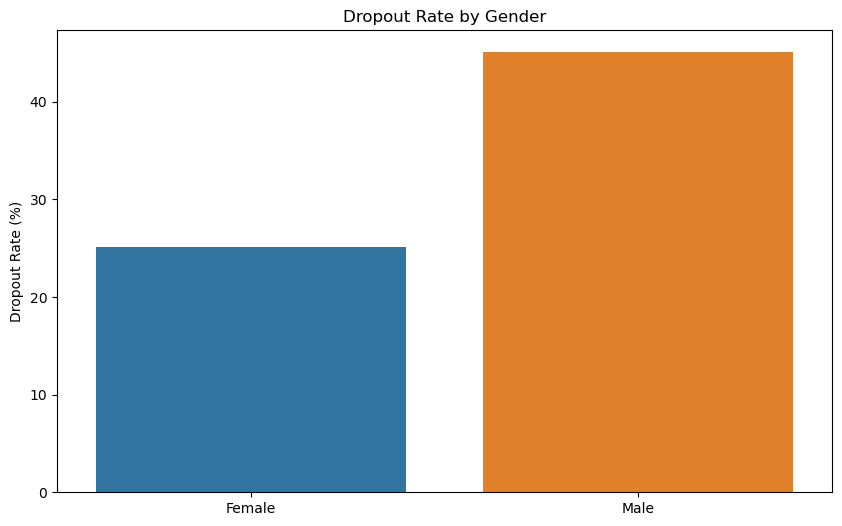

In [135]:
dropout_counts = dropout_df['Gender'].value_counts()
total_counts = df['Gender'].value_counts()

dropout_rate = (dropout_counts / total_counts) * 100

plt.figure(figsize=(10, 6))
sns.barplot(x=dropout_rate.index, y=dropout_rate.values)
plt.ylabel('Dropout Rate (%)')
plt.title('Dropout Rate by Gender')
gender_labels = ['Female', 'Male']  # 0 is Female, 1 is Male
plt.xticks(ticks=[0, 1], labels=gender_labels)
plt.show()

#### What is the age at enrollment, at which we see a turning point from more graduate to more dropout?

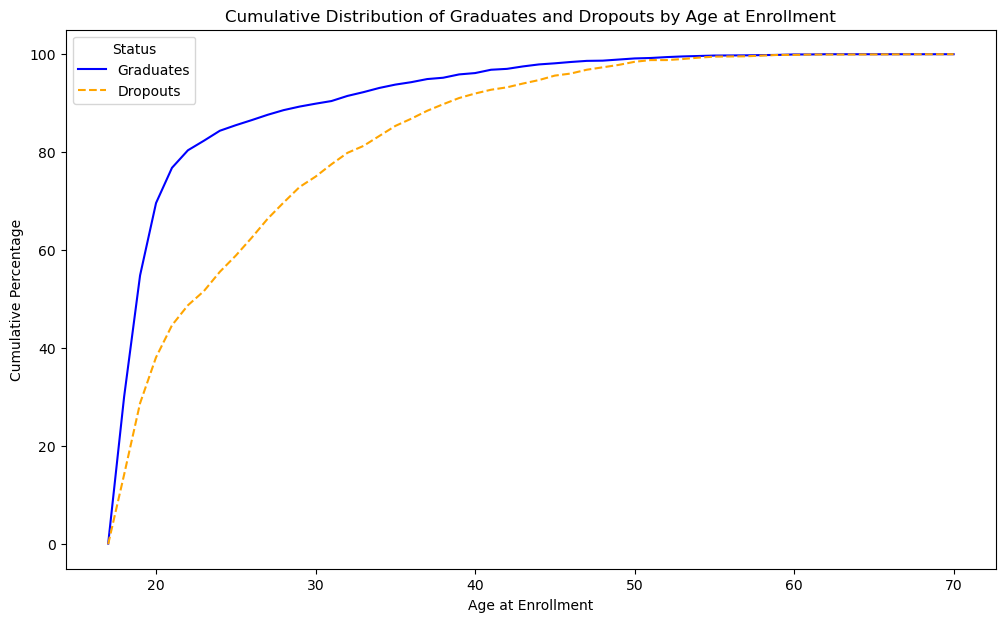

In [136]:
grouped = df.groupby(['Age at enrollment', 'Target']).size().unstack(fill_value=0)

# Calculate cumulative percentage
grouped['cumulative_grad'] = grouped['Graduate'].cumsum() / grouped['Graduate'].sum() * 100
grouped['cumulative_dropout'] = grouped['Dropout'].cumsum() / grouped['Dropout'].sum() * 100

# Plot
plt.figure(figsize=(12, 7))
sns.lineplot(data=grouped['cumulative_grad'], label='Graduates', color='blue')
sns.lineplot(data=grouped['cumulative_dropout'], label='Dropouts', color='orange', linestyle='--')
plt.title('Cumulative Distribution of Graduates and Dropouts by Age at Enrollment')
plt.ylabel('Cumulative Percentage')
plt.xlabel('Age at Enrollment')
plt.legend(title='Status')
plt.show()